# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from secrets import weather_api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import math
call_limit = 50
sets = math.ceil(len(cities)/call_limit)
print(sets)
13

# Split up cities array into roughly equal-sized sets under 50 entries each.
city_sets = np.array_split(cities, sets)
len(city_sets)
len(city_sets[0])

# start API calls

url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "appid": weather_api_key,
    "units": "Imperial"
}

# Collect list of JSON objects.
response_list = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# iterate through list of cities, only append cities with an entry on OpenWeatherMap.
for set_index, city_set in enumerate(city_sets):
    for city_index, city_set in enumerate(city_sets[set_index]):
        print(f"Processing Record {city_index} of Set {set_index} | {city_sets[set_index][city_index]}")
        params['q'] = city_sets[set_index][city_index]    
        
        response = requests.get(url, params=params)
        print(response.url)
        
        response_json = response.json()
        
        # Check that city has entry on OpenWeatherMap.
        if response_json['cod'] == 200:
            response_list.append(response_json)
        else:
            if response_json['cod'] == 404:
                print("City not found. Skipping...")
#     break
    time.sleep(10)
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

13
Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=punta+arenas
Processing Record 1 of Set 0 | eureka
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=eureka
Processing Record 2 of Set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=rikitea
Processing Record 3 of Set 0 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=kulhudhuffushi
Processing Record 4 of Set 0 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=butaritari
Processing Record 5 of Set 0 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=victoria
Processing R

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=huai+mek
Processing Record 4 of Set 1 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=bengkulu
Processing Record 5 of Set 1 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=fortuna
Processing Record 6 of Set 1 | iquique
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=iquique
Processing Record 7 of Set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=georgetown
Processing Record 8 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=hobart
Processing Record 9 of Set 1 | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&unit

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=asau
Processing Record 9 of Set 2 | takhli
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=takhli
Processing Record 10 of Set 2 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=lorengau
Processing Record 11 of Set 2 | vaovai
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=vaovai
Processing Record 12 of Set 2 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=mehamn
Processing Record 13 of Set 2 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=lazaro+cardenas
Processing Record 14 of Set 2 | nalgonda
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=nome
Processing Record 13 of Set 3 | calabozo
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=calabozo
Processing Record 14 of Set 3 | tigil
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=tigil
Processing Record 15 of Set 3 | kribi
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=kribi
Processing Record 16 of Set 3 | mareeba
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=mareeba
Processing Record 17 of Set 3 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=sentyabrskiy
Processing Record 18 of Set 3 | ghanzi
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Im

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=oranjestad
Processing Record 19 of Set 4 | villorba
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=villorba
Processing Record 20 of Set 4 | popondetta
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=popondetta
Processing Record 21 of Set 4 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=hithadhoo
Processing Record 22 of Set 4 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=rocha
Processing Record 23 of Set 4 | tawnat
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=tawnat
Processing Record 24 of Set 4 | sydney
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=querendaro
Processing Record 25 of Set 5 | varhaug
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=varhaug
Processing Record 26 of Set 5 | cururupu
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=cururupu
Processing Record 27 of Set 5 | elk river
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=elk+river
Processing Record 28 of Set 5 | mahdasht
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=mahdasht
Processing Record 29 of Set 5 | turbat
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=turbat
Processing Record 30 of Set 5 | rehoboth
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=nouadhibou
Processing Record 30 of Set 6 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=port+hardy
Processing Record 31 of Set 6 | rokytne
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=rokytne
Processing Record 32 of Set 6 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=kirakira
Processing Record 33 of Set 6 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=nanortalik
Processing Record 34 of Set 6 | terrace
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=terrace
Processing Record 35 of Set 6 | selimpasa
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897ba

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=balotra
Processing Record 35 of Set 7 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=bathsheba
Processing Record 36 of Set 7 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=verkhoyansk
Processing Record 37 of Set 7 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=karratha
Processing Record 38 of Set 7 | russell
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=russell
Processing Record 39 of Set 7 | nabire
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=nabire
Processing Record 40 of Set 7 | mabaruma
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=puerto+madero
Processing Record 39 of Set 8 | aleksandrov gay
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=aleksandrov+gay
Processing Record 40 of Set 8 | batamshinskiy
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=batamshinskiy
Processing Record 41 of Set 8 | kamsack
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=kamsack
Processing Record 42 of Set 8 | makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=makakilo+city
Processing Record 43 of Set 8 | ayer itam
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=ayer+itam
Processing Record 44 of Set 8 | longyearbyen
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=tual
Processing Record 44 of Set 9 | hanchuan
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=hanchuan
Processing Record 45 of Set 9 | benguela
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=benguela
Processing Record 46 of Set 9 | ostersund
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=ostersund
Processing Record 47 of Set 9 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=arraial+do+cabo
Processing Record 48 of Set 9 | prince albert
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=prince+albert
Processing Record 0 of Set 10 | hue
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee

Processing Record 0 of Set 11 | san clemente
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=san+clemente
Processing Record 1 of Set 11 | luwuk
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=luwuk
Processing Record 2 of Set 11 | tomatlan
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=tomatlan
Processing Record 3 of Set 11 | chunskiy
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=chunskiy
Processing Record 4 of Set 11 | mutsamudu
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=mutsamudu
Processing Record 5 of Set 11 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=mys+shmidta
Processing Record 6 of Set 11 | loandjili
http://api.openweathermap.org/

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=buin
Processing Record 6 of Set 12 | haapiti
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=haapiti
Processing Record 7 of Set 12 | port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=port-gentil
Processing Record 8 of Set 12 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=turukhansk
Processing Record 9 of Set 12 | magadan
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=magadan
Processing Record 10 of Set 12 | honiara
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=honiara
Processing Record 11 of Set 12 | canutama
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba39

In [4]:
response_list[0:12]

[{'coord': {'lon': -70.92, 'lat': -53.15},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 37.2,
   'feels_like': 31.41,
   'temp_min': 37,
   'temp_max': 37.4,
   'pressure': 1015,
   'humidity': 74},
  'visibility': 10000,
  'wind': {'speed': 3.36, 'deg': 330},
  'clouds': {'all': 75},
  'dt': 1603275181,
  'sys': {'type': 1,
   'id': 8487,
   'country': 'CL',
   'sunrise': 1603272150,
   'sunset': 1603323217},
  'timezone': -10800,
  'id': 3874787,
  'name': 'Punta Arenas',
  'cod': 200},
 {'coord': {'lon': -124.16, 'lat': 40.8},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 49.23,
   'feels_like': 45.54,
   'temp_min': 48.2,
   'temp_max': 50,
   'pressure': 1017,
   'humidity': 87},
  'visibility': 10000,
  'wind': {'speed': 4.7, 'deg': 210},
  'clouds': {'all': 1},
  'dt': 1603275412,
  'sy

In [5]:

# Use list comprehensions to collect relevant data from response JSON objects.

city_names_list = [response.get('name') for response in response_list]
cloudiness_list = [response.get('clouds').get('all') for response in response_list]
country_list = [response.get('sys').get('country') for response in response_list]
dates_list = [response.get('dt') for response in response_list]
humidity_list = [response.get('main').get('humidity') for response in response_list]
lats_list = [response.get('coord').get('lat') for response in response_list]
lngs_list = [response.get('coord').get('lon') for response in response_list]
temps_list = [response.get('main').get('temp_max') for response in response_list]
wind_list = [response.get('wind').get('speed') for response in response_list]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame.
city_data_df = pd.DataFrame(list(zip(city_names_list, cloudiness_list, country_list,
                                     dates_list, humidity_list, lats_list, lngs_list, 
                                     temps_list, wind_list)), 
                            columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# export city data to .csv in working directory.
city_data_df.to_csv('city_weather_data.csv', index=False)
city_data_df.count()

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [7]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1603275181,74,-53.15,-70.92,37.40,3.36
1,Eureka,1,US,1603275412,87,40.80,-124.16,50.00,4.70
2,Rikitea,33,PF,1603275412,76,-23.12,-134.97,73.49,9.44
3,Kulhudhuffushi,0,MV,1603275412,77,6.62,73.07,82.63,15.50
4,Butaritari,22,KI,1603275413,76,3.07,172.79,82.06,10.78


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

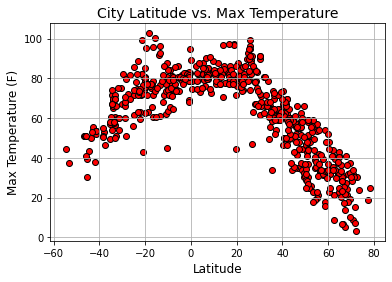

In [45]:

# --- create a scatter plot depicting latitude vs temperature ---

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="red", edgecolors="black")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-temp.png")
plt.show()

In [ ]:
# This scatter plot shows that the temp increases as you approach the Equater.

## Latitude vs. Humidity Plot

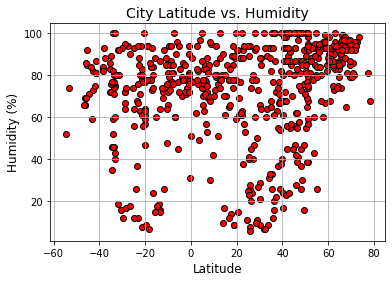

In [11]:
# --- create a scatter plot depicting latitude vs humidity ---
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

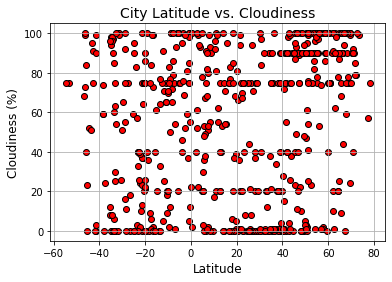

In [12]:

# --- create a scatter plot depicting latitude vs cloudiness ---
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="red", edgecolors="black")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

In [ ]:
# It would seem that cloudiness and proximety to the equateor are unrealted. 

## Latitude vs. Wind Speed Plot

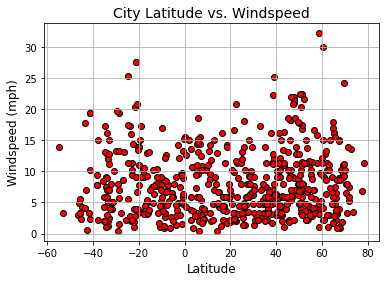

In [13]:
# --- create a scatter plot depicting latitude vs wind speed ---
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Windspeed", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-windspeed.png")
plt.show()

## Linear Regression

In [28]:
def plot_linear_regression(x, y, title, coordinates):
    
 
   
    
    # --- get linear regression values and store in variables ---
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = m * x + b
    regress_values = x * slope + intercept
    
    

    # --- create line equation ---
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
                                                          
    # --- plot the linear model ---
    plt.plot(x, regress_values, color="red")
    
    plt.annotate(line_eq, coordinates, fontsize = 10, color="red" )
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()
    
    


NameError: name 'humidity_over_100' is not defined

In [18]:
northern_hemi= city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi= city_data_df.loc[city_data_df["Lat"] < 0]

northern_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Eureka,1,US,1603275412,87,40.80,-124.16,50.00,4.70
3,Kulhudhuffushi,0,MV,1603275412,77,6.62,73.07,82.63,15.50
4,Butaritari,22,KI,1603275413,76,3.07,172.79,82.06,10.78
5,Hong Kong,70,HK,1603275352,63,22.29,114.16,78.01,1.99
7,Nikolskoye,75,RU,1603275413,93,59.70,30.79,37.00,4.47


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.7806311097250419


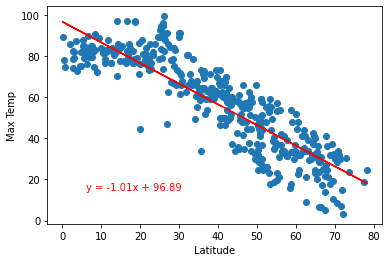

In [29]:
x=northern_hemi["Lat"]
y= northern_hemi["Max Temp"]

plot_linear_regression(x,y,"Max Temp", (6, 15))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.49567680803935016


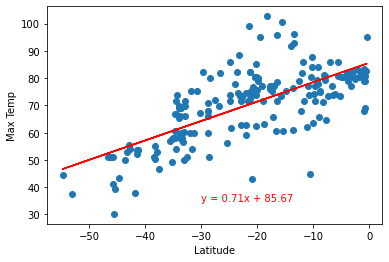

In [31]:
x=southern_hemi["Lat"]
y= southern_hemi["Max Temp"]

plot_linear_regression(x,y,"Max Temp", (-30, 35))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.07011955711468244


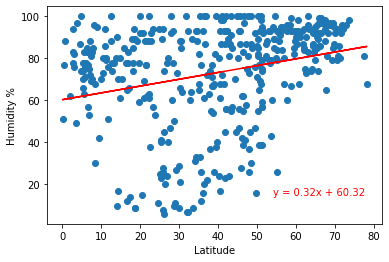

In [35]:
x=northern_hemi["Lat"]
y= northern_hemi["Humidity"]

plot_linear_regression(x,y,"Humidity %", (54, 15))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.0009853939132667701


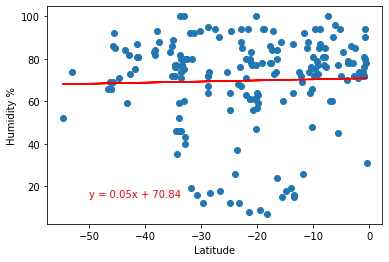

In [37]:
x=southern_hemi["Lat"]
y= southern_hemi["Humidity"]

plot_linear_regression(x,y,"Humidity %", (-50, 15))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.09331712318786743


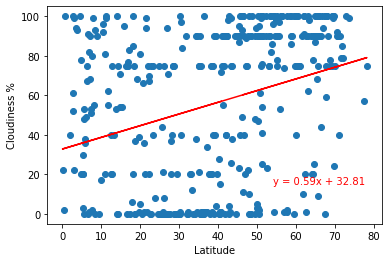

In [38]:
x=northern_hemi["Lat"]
y= northern_hemi["Cloudiness"]

plot_linear_regression(x,y,"Cloudiness %", (54, 15))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.01332749667075532


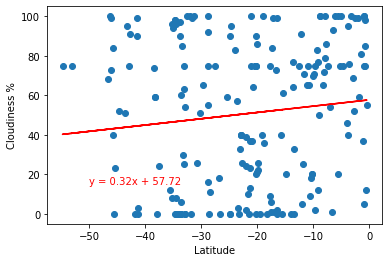

In [40]:
x=southern_hemi["Lat"]
y= southern_hemi["Cloudiness"]

plot_linear_regression(x,y,"Cloudiness %", (-50, 15))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.010451248496877057


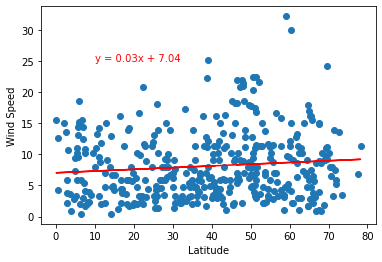

In [42]:
x=northern_hemi["Lat"]
y= northern_hemi["Wind Speed"]

plot_linear_regression(x,y,"Wind Speed", (10, 25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.0013377884476845057


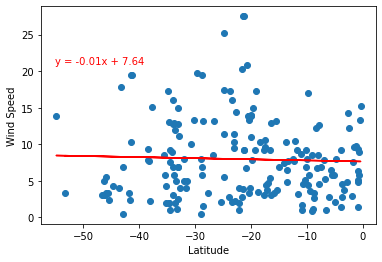

In [44]:
x=southern_hemi["Lat"]
y= southern_hemi["Wind Speed"]

plot_linear_regression(x,y,"Wind Speed", (-55, 21))